In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Lecture 8 Tasks. Linear Regression

In [2]:
# Task 1

X = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 6]

In [11]:
# y = wX + b
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

x_mean = np.mean(X)
y_mean = np.mean(y)

In [12]:
w = np.sum((X - x_mean) * (y - y_mean)) / np.sum((X - x_mean) ** 2)
b = y_mean - w * x_mean

In [13]:
y_pred = w * X + b

Weight (w): 0.8
Bias (b): 1.7999999999999998
Predicted values: [2.6 3.4 4.2 5.  5.8]


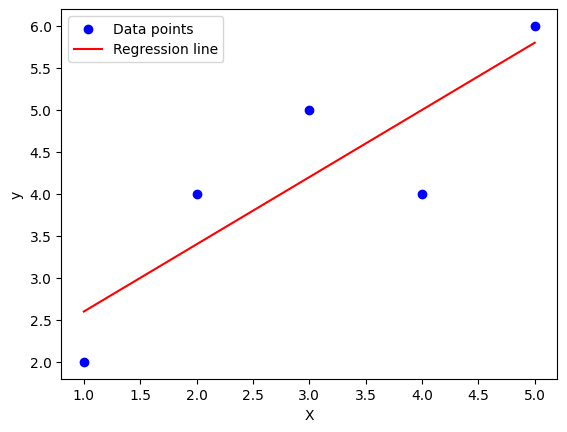

In [14]:
print(f"Weight (w): {w}")
print(f"Bias (b): {b}") 
print(f"Predicted values: {y_pred.flatten()}")
# Plotting the results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Task 2

In [16]:
X = np.array([[10], [20], [30], [40], [50]])
y = np.array([15, 25, 35, 45, 60])

In [19]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_pred = model.predict(X)

w: [1.1]
b: 3.0
MSE: 1.9999999999999942


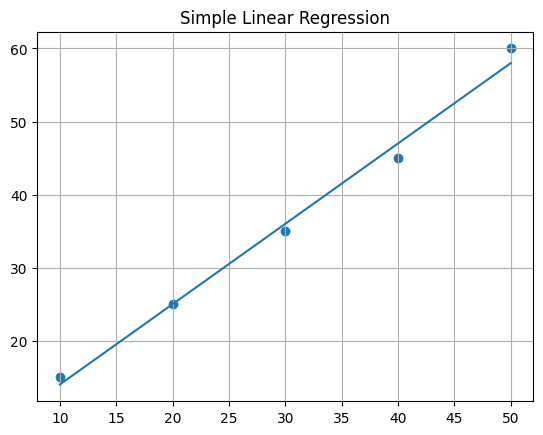

In [21]:
print("w:", model.coef_)
print("b:", model.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

plt.scatter(X, y)
plt.plot(X, y_pred)
plt.title("Simple Linear Regression")
plt.grid()
plt.show()

In [24]:
w = model.coef_[0]
b = model.intercept_

print(f"coef_: {w:.2f}")
print(f"intercept_: {b:.2f}")

coef_: 1.10
intercept_: 3.00
